In [30]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv("plagiarism_pairs.csv")  
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)


In [32]:
# Dividir en train y test

# TF-IDF sobre TODO el corpus (para no perder tokens)
corpus = df_train['code1'].tolist() + df_train['code2'].tolist() + df_test['code1'].tolist() + df_test['code2'].tolist()
vectorizer = TfidfVectorizer(token_pattern=r'(?u)\b\w+\b', lowercase=False)
vectorizer.fit(corpus)

# Vectorizar y calcular similitud coseno en TEST
code1_vecs = vectorizer.transform(df_test['code1'].tolist())
code2_vecs = vectorizer.transform(df_test['code2'].tolist())

similarities = []
for i in range(len(df_test)):
    sim = cosine_similarity(code1_vecs[i], code2_vecs[i])[0][0]
    similarities.append(sim)

# Predicción con umbral
threshold = 0.5
df_test['Similitud_Coseno'] = similarities
df_test['Predicción_Plagio'] = df_test['Similitud_Coseno'].apply(lambda x: 1 if x >= threshold else 0)


Reporte de clasificación:
              precision    recall  f1-score   support

   No plagio       0.67      0.93      0.78       135
      Plagio       0.88      0.52      0.66       128

    accuracy                           0.73       263
   macro avg       0.78      0.73      0.72       263
weighted avg       0.77      0.73      0.72       263



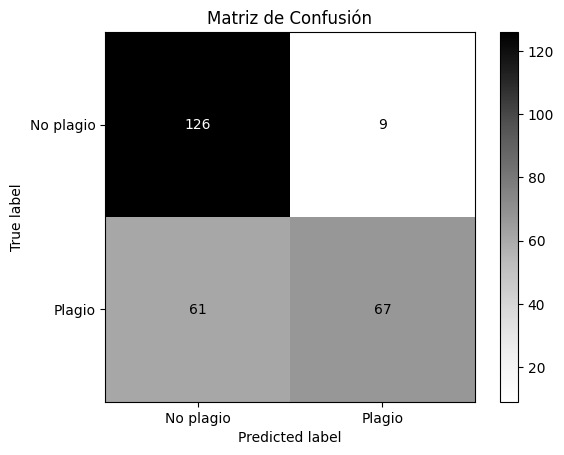

In [34]:
# Evaluación
y_test = df_test['label']
y_pred = df_test['Predicción_Plagio']

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=['No plagio', 'Plagio']))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No plagio', 'Plagio'])
disp.plot(cmap='Grays') 
plt.title('Matriz de Confusión')
plt.show()